In [21]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [22]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [23]:
roux_virgin_Ti64_r01 = pd.read_csv('2024-07-16 Roux_Virgin Ti64_R01 PyImageJ Results.csv')
roux_virgin_Ti64_r01.columns

Index([' ', 'Area', 'Mean', 'StdDev', 'Min', 'Max', 'X', 'Y', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Major', 'Minor', 'Angle', 'Circ.', 'Feret',
       'IntDen', 'Median', 'Skew', 'Kurt', '%Area', 'RawIntDen', 'Slice',
       'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR', 'Round',
       'Solidity'],
      dtype='object')

In [24]:
flowcam_virgin_Ti64_results = pd.read_csv('Results_3_Full_8_14_2024.csv',  encoding='ISO-8859-1')
flowcam_virgin_Ti64_results.columns

Index(['Name', 'Area (ABD) (µm²)', 'Area (Filled) (µm²)', 'Aspect Ratio',
       'Biovolume (Cylinder) (µm³)', 'Biovolume (P. Spheroid) (µm³)',
       'Biovolume (Sphere) (µm³)', 'Capture ID', 'Capture X (px)',
       'Capture Y (px)', 'Ch1 Area', 'Ch2 Area', 'Ch2/Ch1 Ratio', 'Circle Fit',
       'Circularity', 'Circularity (Hu)', 'Convex Perimeter (µm)', 'Convexity',
       'Diameter (ABD) (µm)', 'Diameter (ESD) (µm)', 'Diameter (FD) (µm)',
       'Edge Gradient', 'Elongation', 'Feret Angle Max (°)',
       'Feret Angle Min (°)', 'Fiber Straightness', 'Geodesic Aspect Ratio',
       'Geodesic Length (µm)', 'Geodesic Thickness (µm)', 'Length (µm)',
       'Particles Per Chain', 'Perimeter (µm)', 'Roughness',
       'Sphere Complement (µm³)', 'Sphere Count', 'Sphere Unknown (µm³)',
       'Sphere Volume (µm³)', 'Sqrt Circularity', 'Symmetry', 'Timestamp',
       'Volume (ABD) (µm³)', 'Volume (ESD) (µm³)', 'Width (µm)'],
      dtype='object')

In [25]:
pyimagej_roux_virgin_Ti64_r01_circularity = roux_virgin_Ti64_r01[['Circ.']]
pyimagej_roux_virgin_Ti64_r01_circularity 

,Circ.
0,0.935
1,0.929
2,0.910
3,0.840
4,0.809
...,...
139,0.822
140,0.914
141,0.852
142,0.830


In [26]:
flowcam_virgin_Ti64_results_circularity = flowcam_virgin_Ti64_results[['Circularity']]
flowcam_virgin_Ti64_results_circularity

,Circularity
0,0.90
1,0.79
2,0.88
3,0.93
4,0.81
...,...
139,0.84
140,0.94
141,0.93
142,0.94


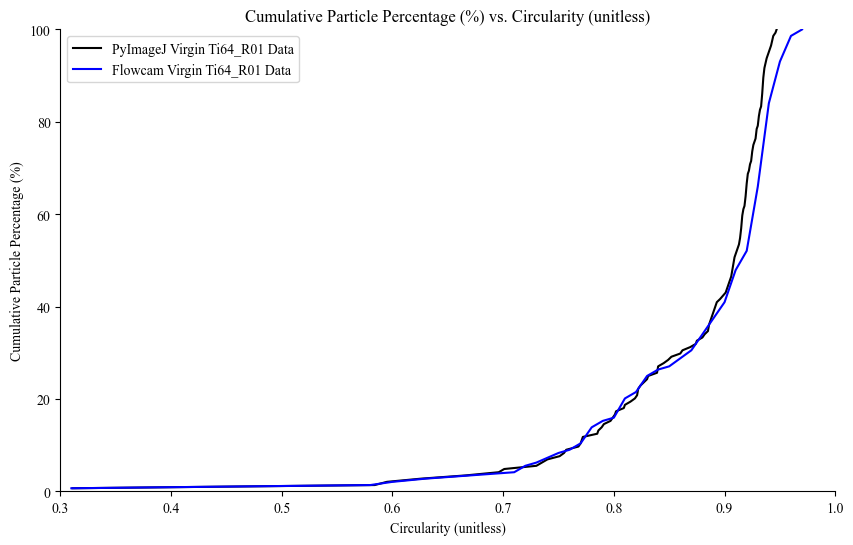

In [27]:
# calculate percentages and counts for pyimagej data
pyimagej_circularity_counts = pyimagej_roux_virgin_Ti64_r01_circularity['Circ.'].value_counts().sort_index()
pyimagej_circularity_counts = pyimagej_circularity_counts.cumsum()
pyimagej_circularity_percentage = (pyimagej_circularity_counts / pyimagej_circularity_counts.max()) * 100

#calculate percentages and counts for flowcam data
flowcam_circularity_counts = flowcam_virgin_Ti64_results_circularity['Circularity'].value_counts().sort_index()
flowcam_circularity_counts = flowcam_circularity_counts.cumsum()
flowcam_circularity_percentage = (flowcam_circularity_counts / flowcam_circularity_counts.max()) * 100

# plot
plt.figure(figsize=(10, 6))
plt.plot(pyimagej_circularity_percentage.index, pyimagej_circularity_percentage.values, linestyle='-', color='black', label='PyImageJ Virgin Ti64_R01 Data')
plt.plot(flowcam_circularity_percentage.index, flowcam_circularity_percentage.values, linestyle='-', color='blue', label='Flowcam Virgin Ti64_R01 Data')
plt.legend()
plt.xlabel('Circularity (unitless)')
plt.ylabel('Cumulative Particle Percentage (%)')
plt.title('Cumulative Particle Percentage (%) vs. Circularity (unitless)')

plt.show()

In [28]:
pyimagej_roux_virgin_Ti64_r01_feret_diameter = roux_virgin_Ti64_r01[['Feret']]
pyimagej_roux_virgin_Ti64_r01_feret_diameter

,Feret
0,42.687
1,43.858
2,46.053
3,57.704
4,67.052
...,...
139,60.369
140,46.034
141,82.796
142,68.638


In [29]:
flowcam_virgin_Ti64_diameter = flowcam_virgin_Ti64_results[['Diameter (ESD) (µm)']]
flowcam_virgin_Ti64_diameter

,Diameter (ESD) (µm)
0,96.92
1,101.96
2,88.78
3,68.28
4,72.35
...,...
139,78.25
140,52.45
141,49.55
142,50.67


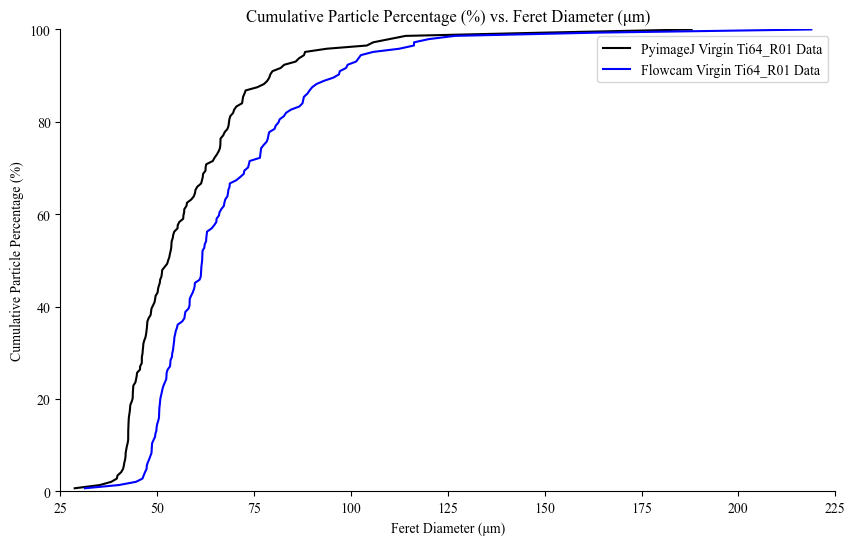

In [30]:
# calculate diameteres and percentages for pyimagej and flowcam
pyimagej_feret_counts = pyimagej_roux_virgin_Ti64_r01_feret_diameter['Feret'].value_counts().sort_index()
pyimagej_feret_counts = pyimagej_feret_counts.cumsum()
pyimagej_feret_percentage = (pyimagej_feret_counts / pyimagej_feret_counts.max()) * 100

flowcam_feret_counts = flowcam_virgin_Ti64_diameter['Diameter (ESD) (µm)'].value_counts().sort_index()
flowcam_feret_counts = flowcam_feret_counts.cumsum()
flowcam_feret_percentage = (flowcam_feret_counts / flowcam_feret_counts.max()) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pyimagej_feret_percentage.index, pyimagej_feret_percentage.values, linestyle='-', color='black', label='PyimageJ Virgin Ti64_R01 Data')
plt.plot(flowcam_feret_percentage.index, flowcam_feret_percentage.values, linestyle='-', color='blue', label='Flowcam Virgin Ti64_R01 Data')
plt.legend()
plt.xlabel('Feret Diameter (μm)')
plt.ylabel('Cumulative Particle Percentage (%)')
plt.title('Cumulative Particle Percentage (%) vs. Feret Diameter (μm)')

plt.show()